The `ping` command is a network utility used to test the reachability of a host on an Internet Protocol (IP) network. It also measures the round-trip time for messages sent from the originating host to a destination computer.

### How It Works:
1. **Send ICMP Echo Request**: The `ping` command sends a series of Internet Control Message Protocol (ICMP) Echo Request messages to the target host.
2. **Receive ICMP Echo Reply**: The target host responds with ICMP Echo Reply messages.
3. **Measure Time**: The time taken for these messages to travel to the target host and back (round-trip time) is measured.

### Typical Outputs:
- **Bytes**: The number of bytes in the message.
- **Time**: The round-trip time it takes for a message to reach the host and come back.
- **TTL (Time to Live)**: The maximum number of hops a packet can take before being discarded.

### Example Use:
```bash
ping 192.168.1.1
```

### Common Usage:
- **Diagnose Network Issues**: Determine if a network device is reachable.
- **Measure Latency**: Check the delay between the source and destination.
- **Check Network Configuration**: Verify if the network setup is correct.

This tool is essential for network troubleshooting and maintenance, providing a straightforward way to test connectivity. 

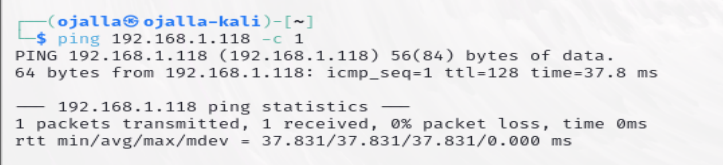

The `-c 1` flag is a delimiter that specifies a count of 1.

We could pipe the output of this into a text file by using the `>` operator.

`ping 192.168.1.118 -c 1 > ip.txt`

So that pings that IP address, and pipes the output (succesful or not) to the file ip.txt.

You can read the contents of the file by doing:
`cat ip.txt`
The output should look like this:
<blockquote>
PING 192.168.1.118 (192.168.1.118) 56(84) bytes of data.
64 bytes from 192.168.1.118: icmp_seq=1 ttl=128 time=89.7 ms

--- 192.168.1.118 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 89.726/89.726/89.726/0.000 ms
</blockquote>


If we wanted to run a quick search on the contents of the text file `ip.txt`, we could use a tool called grep:
Example:
`cat ip.txt | grep "64 bytes"`
What this does is to look for a line with the substring "64 bytes", the output shoul look like this:

`64 bytes from 192.168.1.118: icmp_seq=1 ttl=128 time=89.7 ms`

If we wanted to extract the ip-address from the output string, we could go further and keep piping by doing:
</br>
`cat ip.txt | grep "64 bytes" | cut -d " " -f 4`
</br>
The second pipe uses  the `cut` command with a `-d` delimiter of " " which is a single space (it cuts the string on spaces) and the flag `-f 4` pics out the 4th content, in this case the IP address:
</br>
`192.168.1.118:` 

The IP address is almost perfect, but it's that colon. To remove it we can add an additional pipe with the `tr` (translate) keyword with a dilimiiter (-d) of ":"

`cat ip.txt | grep "64 bytes" | cut -d " " -f 4 | tr -d ':'`

That now gives us the final perfect output:

`192.168.1.118`

Below is a bash script for an IpSweep.

```bash
#!/bin/bash

# Check if an argument is provided
if [ "$1" == "" ]; then
  echo "You forgot an IP address!"
  echo "Syntax: ./ipsweep.sh 192.168.1"
else
  # Loop through the IP range 1-254
  for ip in `seq 1 254`; do
    # Ping each IP and extract the active ones
    ping -c 1 $1.$ip | grep "64 bytes" | cut -d " " -f 4 | tr -d ":" &
  done
fi
```


Here's what's going on:

### Detailed Breakdown

#### 1. Shebang Line
```bash
#!/bin/bash
```
- This tells the system to use the Bash shell to execute the script.

#### 2. Argument Check
```bash
if [ "$1" == "" ]; then
```
- `$1`: Refers to the first command-line argument passed to the script.
- `== ""`: Checks if this argument is an empty string.
- `then`: If the condition is true (i.e., no argument is given), execute the following commands.

#### 3. Error Message and Syntax Reminder
```bash
  echo "You forgot an IP address!"
  echo "Syntax: ./ipsweep.sh 192.168.1"
```
- `echo`: Prints text to the terminal.
- The error message reminds the user to provide an IP address or subnet.

#### 4. Else Block for Loop Execution
```bash
else
  for ip in `seq 1 254`; do
```
- `else`: Executes the following commands if the initial `if` condition is false (i.e., an argument is given).
- `for ip in \`seq 1 254\``: A loop that iterates over the numbers 1 to 254.
  - `seq 1 254`: Generates a sequence of numbers from 1 to 254.
  - `ip`: A variable that takes each value in the sequence on each iteration.

#### 5. Ping Command Execution
```bash
    ping -c 1 $1.$ip | grep "64 bytes" | cut -d " " -f 4 | tr -d ":" &
```
- `ping -c 1 $1.$ip`: Sends one ICMP Echo Request packet to the IP address `$1.$ip`.
  - `-c 1`: Limits the ping to 1 packet.
  - `$1.$ip`: Constructs the IP address using the first argument and the current loop number.
- `|`: Pipes the output of the `ping` command to the next command.
- `grep "64 bytes"`: Filters the output to include only lines containing "64 bytes", indicating a successful ping response.
- `cut -d " " -f 4`: Splits the filtered lines by spaces and extracts the fourth field, which is the IP address.
  - `-d " "`: Uses space as the delimiter.
  - `-f 4`: Selects the fourth field.
- `tr -d ":"`: Removes the colon at the end of the IP address.
  - `-d ":"`: Deletes colons from the extracted IP addresses.
- `&`: Runs the command in the background, allowing the script to handle multiple pings simultaneously.

#### 6. End of Loop and Conditional
```bash
  done
fi
```
- `done`: Marks the end of the `for` loop.
- `fi`: Marks the end of the `if-else` conditional block.
